In [1]:
from fxpmath import Fxp

In [2]:
x = Fxp(-7.1253, signed=True, n_word=16, n_frac=12)
x.get_val() 
x.bin(frac_dot=True)
x.hex()
x.astype(complex)
x.val
x.set_val(2.125)
x.get_val() 

2.125

In [3]:
a = -7.252
b = 1.512
c = -0.5
x1 = Fxp(a, signed=True, n_word=16, n_frac=12)
x2 = Fxp(b, signed=True, n_word=16, n_frac=12)
x3 = Fxp(c, signed=True, n_word=16, n_frac=12)

y = 2*x1 + x2 - 0.5     # y is a new Fxp object

y = x1*x3 - 3*x2        # y is a new Fxp object, again
print(y.get_val())
print(a*c - 3 * b)

-0.909912109375
-0.9099999999999997


In [122]:
import pydicom as dg
import numpy as np
import matplotlib.pyplot as plt

def gen_sin (freq_sample, num_samples, freq_signal, amp_signal, phase_signal=0.0):
    """
    Sine signal generation 

        Parameters:
            freq_sample : samplig frecuency.

            num_cycles : cycles's number of freq_signal 

            freq_signal : generated signal frecuency.

            amp_signal : generated signal amplitud.

            phase_signal : generated signal initial phase (0 to 2pi).

        Returns:
            t_signal : array with the tiempo of samplig.

            g_signal : array with the signal.

    """
    t_sample = 1.0 / freq_sample
    t_end = t_sample * num_samples
    # sampling interval
    t_signal = np.arange(start=0, stop=t_end, step=t_sample) 
    g_signal = amp_signal * np.sin(2*np.pi * freq_signal * t_signal)

    return t_signal, g_signal

def gen_rect (freq_sample, num_samples, sample_start, sample_end, amp_signal):
    """
    Sine signal generation 

        Parameters:
            freq_sample : samplig frecuency.

            num_cycles : cycles's number of freq_signal 

            freq_signal : generated signal frecuency.

            amp_signal : generated signal amplitud.

            phase_signal : generated signal initial phase (0 to 2pi).

        Returns:
            t_signal : array with the tiempo of samplig.

            g_signal : array with the signal.

    """
    t_sample = 1.0 / freq_sample
    t_end = t_sample * num_samples
    # sampling interval
    t_signal = np.arange(start=0, stop=t_end, step=t_sample) 
    g_signal = np.zeros(len(t_signal))
    g_signal[sample_start:sample_end] = amp_signal

    return t_signal, g_signal

def plt_fft(t_signal, g_signal, freq_sample, fmin, fmax, amin , amax):
    N = len(g_signal)
    f_step = freq_sample / N
    f_signal = np.arange(start=0, stop=freq_sample, step=f_step) 
    SIGNAL = np.fft.fft(g_signal)
    X_mag = np.abs(SIGNAL)/N

    f_plot = f_signal[0:int(N/2 +1)]
    S_plot = 2 * X_mag [0:int(N/2 +1)]
    S_plot[0] = f_plot[0]/2

    # Plot signal
    fig, [ax1, ax2] = plt.subplots(2,1)
    fig.set_size_inches(12, 6)

    ax1.set_title('Waveform')
    ax1.plot(t_signal, g_signal, '.-')
    ax1.set_ylabel('amplitud')
    ax1.set_xlabel('time')
    ax1.grid(True)

    ax2.plot(f_plot, S_plot, '.')
    ax2.set_xlim(fmin,fmax)
    ax2.set_ylim(amin,amax)
    ax2.grid(True)

    plt.show()    

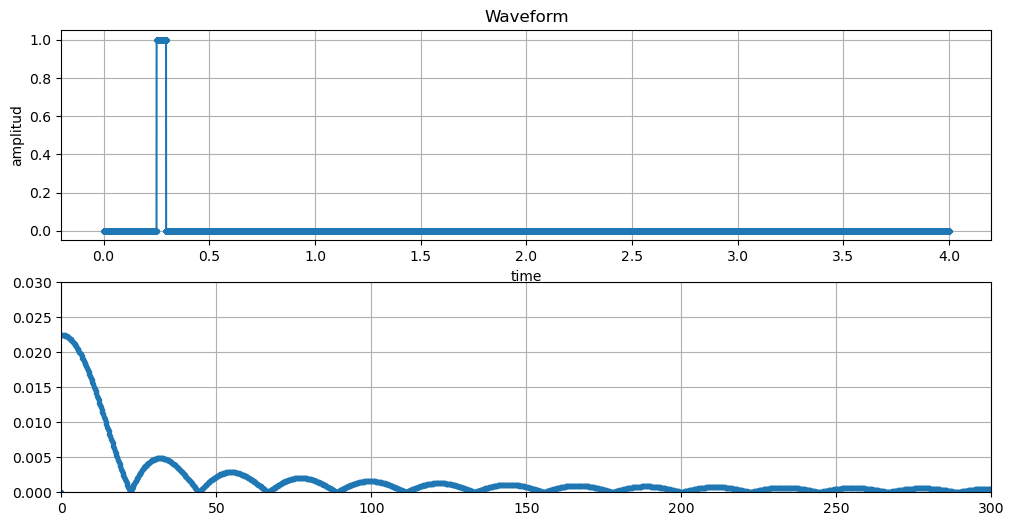

In [137]:
# Construct a time signal

import matplotlib.pyplot as plt

freq_sample = 20000
num_samples = 80000
freq_signal1 = 1005
amp_signal1 = 1.0
amp_signal2 = 0.5

freq_signal2 = 1006

t_signal, g_signal1 = gen_sin(freq_sample, num_samples, freq_signal1, amp_signal1)

t_signal, g_signal2 = gen_sin(freq_sample, num_samples, freq_signal2, amp_signal2)

g_signal = g_signal1 + g_signal2

t_signal, g_signal3 = gen_rect(freq_sample, num_samples, 5000, 5900, 1)

# Perform FFT

plt_fft(t_signal, g_signal3, freq_sample, 0, 300, 0, 0.03)
